<a href="https://colab.research.google.com/github/SplashyZues5197/AWS_Cloud_to_python/blob/main/Used_Car_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 15.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:

import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn
from sklearn.metrics import accuracy_score,confusion_matrix


In [4]:
df = pd.read_csv('autos.csv')

In [ ]:

(Exploratory Data Analysis (EDA):

Begin with a comprehensive exploration of the dataset. Analyze basic statistics, distributions, and correlations.
Visualize the data to understand patterns and trends. Plot histograms, scatter plots, and box plots for key features.
Identify outliers and anomalies that may need special attention during data cleaning.
Predictive Modeling:

Predict the price of used cars based on various features like mileage, model year, brand, etc. This can be approached as a regression problem.
Utilize regression algorithms such as Linear Regression, Decision Trees, Random Forest, or Gradient Boosting.
Classification:

Classify cars into categories (e.g., low, medium, high price ranges) using features like brand, model, and mileage.
Explore classification algorithms such as Logistic Regression, Decision Trees, or Support Vector Machines.
Clustering:

Group similar cars together based on features like mileage, engine size, or brand using clustering algorithms like K-means.
Discover hidden patterns in the data and identify different segments of the used car market.
Time Series Analysis:

If your dataset includes a timestamp, analyze trends and patterns over time. This could include seasonality in prices or changes in popularity of certain brands or models.
Feature Engineering:

Create new features from existing ones. For example, derive a "car age" feature from the model year and the current year.
Use one-hot encoding for categorical variables and handle missing data appropriately.
Natural Language Processing (NLP):

If your dataset includes text data (e.g., descriptions or reviews of the cars), consider applying NLP techniques for sentiment analysis or keyword extraction.
Anomaly Detection:

Identify unusual patterns or outliers in the dataset that may indicate fraud or errors. Use anomaly detection algorithms to flag unusual transactions or entries.
Recommendation System:

Build a recommendation system for users looking to buy used cars based on their preferences and historical data.
Geospatial Analysis:
If your dataset includes location data, analyze spatial trends such as regional variations in used car prices or popularity of specific brands.

In [28]:
df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [5]:
df.isnull().sum()
#Many Null values in new_price, seats, power, engine and mileage.

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

# **Manual vs Automatic**

<Axes: xlabel='Transmission', ylabel='Price'>

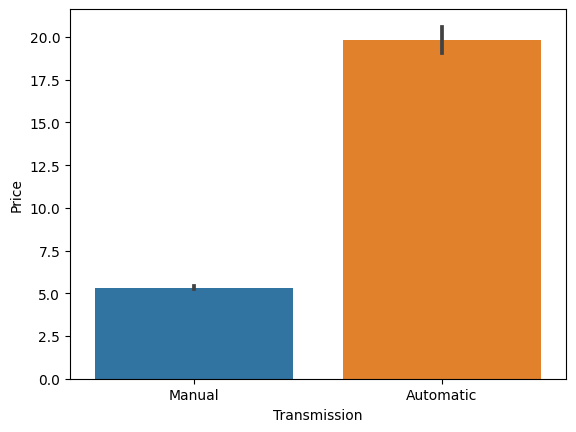

In [6]:
sns.barplot(df, x = 'Transmission', y = 'Price')

<Axes: xlabel='Transmission', ylabel='count'>

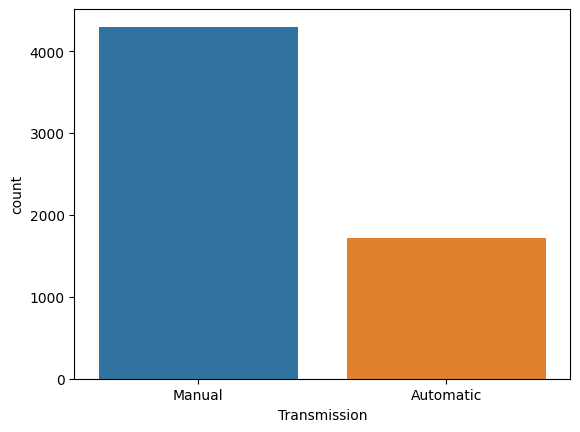

In [9]:
sns.countplot(df, x = "Transmission")

# **Petrol vs Diesel**

<Axes: xlabel='Fuel_Type', ylabel='Price'>

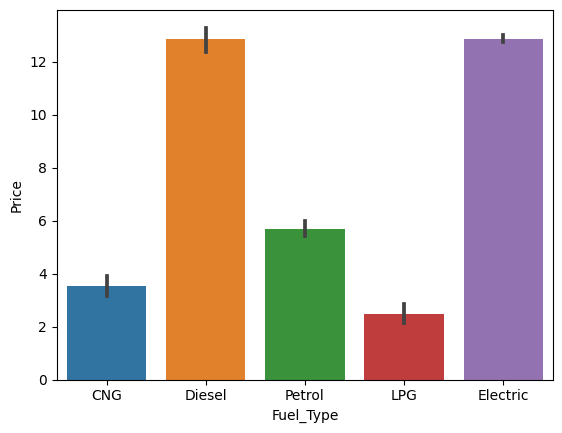

In [17]:
sns.barplot(df, x = "Fuel_Type", y = "Price")

<Axes: xlabel='Fuel_Type', ylabel='count'>

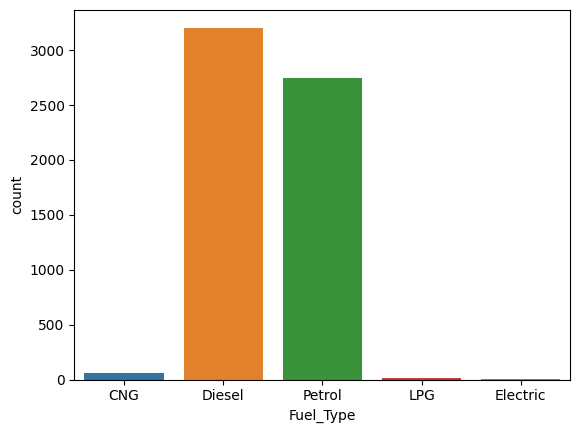

In [10]:
sns.countplot(df, x= "Fuel_Type")